In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
import seaborn as sns

In [61]:
def strømstøtte_calc(x, p, q):
    return np.where(x <= p, x, p + q * (x-p))

In [54]:
spot = pd.read_excel(Path('Data.xlsx'), sheet_name='Spotpris')
spot['Time'] = spot['Time'].apply(lambda x: datetime.time(hour=x-1))
spot['Timestamp'] = pd.to_datetime(spot['Dato'].astype(str) + ' ' + spot['Time'].astype(str))
spot.set_index('Timestamp', inplace=True)
spot.drop(columns=['Dato', 'Time'], inplace=True)

vol = pd.read_excel(Path('Data.xlsx'), sheet_name='Forbruk')
vol['Time'] = vol['Time'].apply(lambda x: datetime.time(hour=x-1))
vol['Timestamp'] = pd.to_datetime(vol['Dato'].astype(str) + ' ' + vol['Time'].astype(str))
vol.set_index('Timestamp', inplace=True)
vol.drop(columns=['Dato', 'Time'], inplace=True)

In [ ]:
strømstøtte = spot.apply(strømstøtte_calc, args=(0.75, 0.10))
norgespris = pd.DataFrame(0.4, index=spot.index, columns=spot.columns)

<Axes: title={'center': 'Scatter plot of Profil A vs Profil B'}, xlabel='Profil A', ylabel='Profil B'>

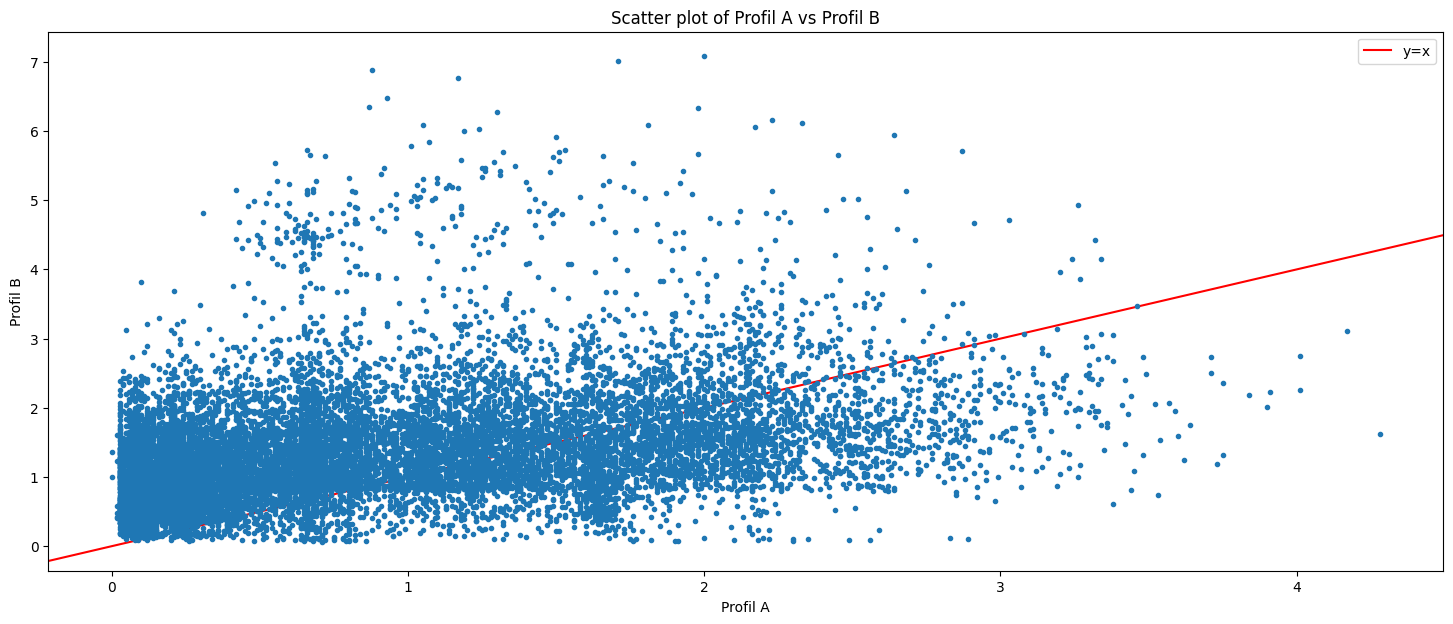

In [36]:
fig, ax = plt.subplots(figsize=(18,7))
ax.set(xlabel='Profil A', ylabel='Profil B', title='Scatter plot of Profil A vs Profil B')
ax.axline((0,0), slope=1, color='red', linestyle='-', label='y=x')
ax.legend()
vol.plot(x='Profil A', y='Profil B', style='.', legend=False, ax=ax)

In [75]:
cost_ab_spot = pd.DataFrame({'Profil A': vol['Profil A'] * spot['NO1'], 'Profil B': vol['Profil B'] * spot['NO2']}).loc['2023':'2024']
cost_ab_strøm = pd.DataFrame({'Profil A': vol['Profil A'] * strømstøtte['NO1'], 'Profil B': vol['Profil B'] * strømstøtte['NO2']}).loc['2023':'2024']
cost_ab_norges = vol[['Profil A', 'Profil B']] * 0.4

<Axes: xlabel='Timestamp'>

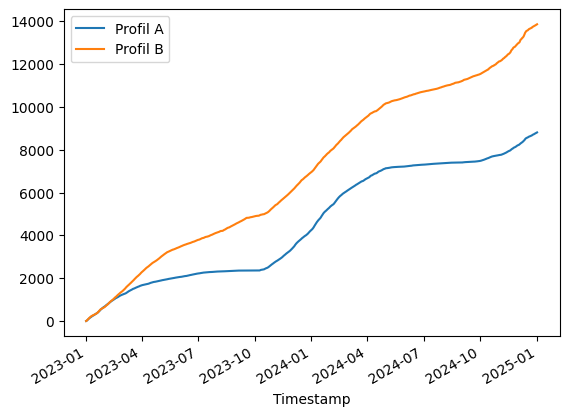

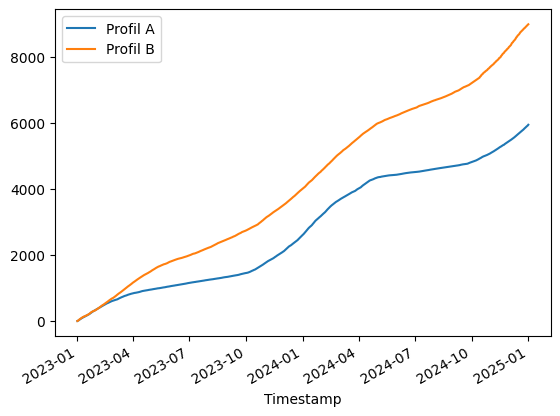

In [88]:
cost_ab_strøm.cumsum().plot()
cost_ab_norges.cumsum().plot()

In [80]:
strømstøtte_agg = cost_ab_strøm.resample('YS').sum().round(2)
norges_agg = cost_ab_norges.resample('YS').sum().round(2)

In [85]:
pd.concat({
    'strømstøtte': strømstøtte_agg, 
    'norgespris': norges_agg
}).to_csv('cost_agg.csv')

In [93]:
cost_no_spot = (vol[['NO1', 'NO2']] * spot[['NO1', 'NO2']]).loc['2023':'2024']
cost_no_strøm = (vol[['NO1', 'NO2']] * strømstøtte[['NO1', 'NO2']]).loc['2023':'2024']
cost_no_norges = vol[['NO1', 'NO2']] * 0.4

In [94]:
strømstøtte_no_agg = cost_no_strøm.resample('YS').sum().round(2)
norgespris_no_agg = cost_no_norges.resample('YS').sum().round(2)

<Axes: xlabel='Timestamp'>

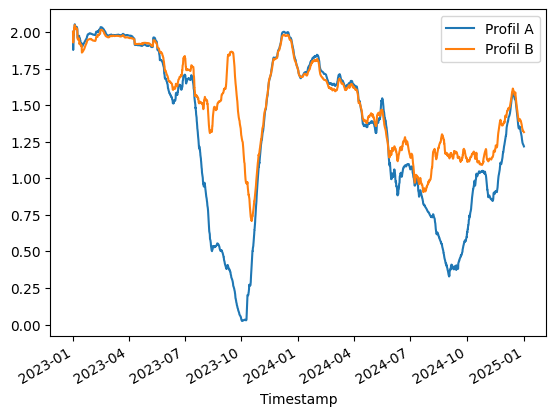

In [175]:
(cost_ab_strøm.rolling('30d').sum() / cost_ab_norges.rolling('30d').sum()).plot()

In [95]:
pd.concat({
    'strømstøtte': strømstøtte_no_agg, 
    'norgespris': norgespris_no_agg
})

NO1      NO2
            Timestamp                   
strømstøtte 2023-01-01  8936.91  9719.88
            2024-01-01  7180.41  7959.94
norgespris  2023-01-01  5578.96  5536.41
            2024-01-01  5638.91  5656.99

In [96]:
pd.concat({
    'strømstøtte': strømstøtte_agg, 
    'norgespris': norges_agg
})

Profil A  Profil B
            Timestamp                     
strømstøtte 2023-01-01   4251.38   6955.29
            2024-01-01   4557.83   6905.09
norgespris  2023-01-01   2603.85   4001.15
            2024-01-01   3341.89   4988.67

In [109]:
1-norges_agg / strømstøtte_agg

,Profil A,Profil B
Timestamp,,
2023-01-01,0.387528,0.424733
2024-01-01,0.266780,0.277537


<Axes: title={'center': 'Profil B consumption in 2023'}, xlabel='Timestamp', ylabel='kWh'>

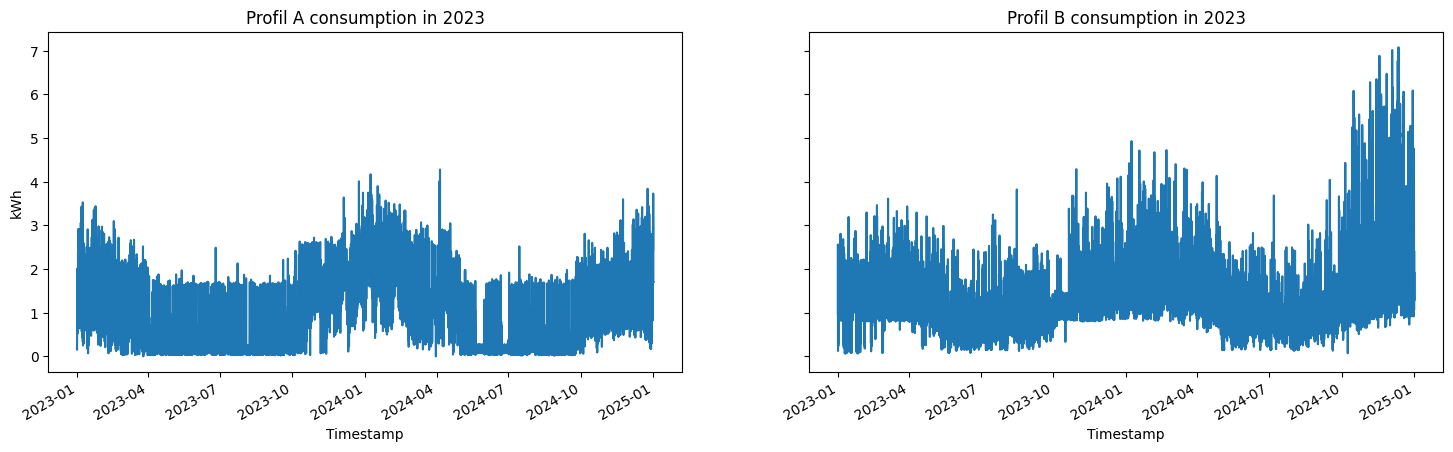

In [167]:
fig, ax = plt.subplots(1,2, figsize=(18,5),sharey=True)
vol['Profil A'].plot(ax=ax[0], title='Profil A consumption in 2023', ylabel='kWh')
vol['Profil B'].plot(ax=ax[1], title='Profil B consumption in 2023', ylabel='kWh')

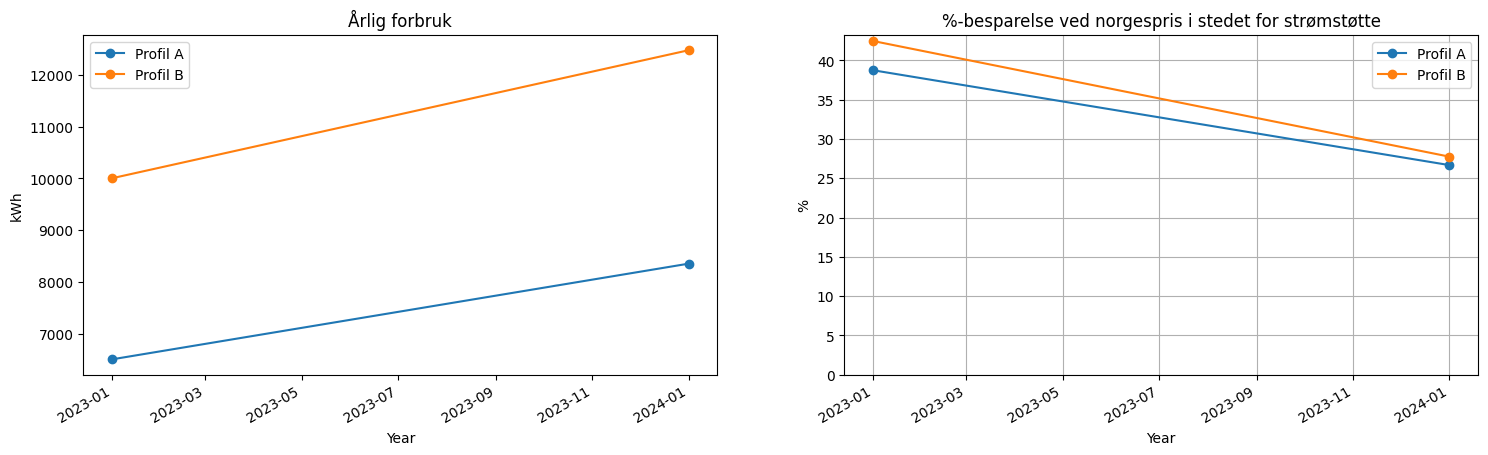

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))
vol.loc['2023':'2024',['Profil A', 'Profil B']].resample('YS').sum().plot(style='-o', x_compat=True, ax=ax[0])
ax[0].set(title='Årlig forbruk', xlabel='Year', ylabel='kWh')
((strømstøtte_agg - norges_agg) / strømstøtte_agg).mul(100).plot(style='-o', x_compat=True, ax=ax[1])
ax[1].set(title='%-besparelse ved norgespris i stedet for strømstøtte', xlabel='Year', ylabel='%')
ax[1].set_ylim(0, None)
ax[1].grid()

In [100]:
vol.resample('YS').sum()

,Profil A,Profil B,NO1,NO2,NO3,NO4,NO5
Timestamp,,,,,,,
2023-01-01,6509.63,10002.882,13947.393195,13841.013318,15350.512605,19388.580400,13694.545681
2024-01-01,8354.73,12471.671,14097.278243,14142.471966,14809.109053,19177.342063,13817.737721


<Axes: xlabel='Timestamp'>

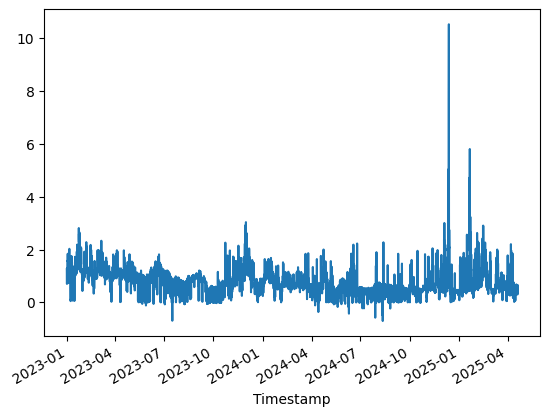

In [103]:
spot['NO2'].plot()

In [104]:
strømstøtte

,NO1,NO2,NO3,NO4,NO5
Timestamp,,,,,
2023-01-01 00:00:00,0.800549,0.800549,0.24569,0.24569,0.800549
2023-01-01 01:00:00,0.789512,0.789512,0.24495,0.24495,0.789512
2023-01-01 02:00:00,0.782735,0.782735,0.24590,0.24590,0.782735
2023-01-01 03:00:00,0.772182,0.772182,0.24906,0.24906,0.772182
2023-01-01 04:00:00,0.761975,0.761975,0.25379,0.25379,0.761975
...,...,...,...,...,...
2025-04-19 19:00:00,0.578080,0.645810,0.00821,0.01726,0.386770
2025-04-19 20:00:00,0.587480,0.657360,0.00583,0.02024,0.388560
2025-04-19 21:00:00,0.582240,0.645930,0.00500,0.02012,0.384270


In [169]:
(cost_ab_strøm.resample('YS').sum() / vol.loc['2023':'2024', ['Profil A', 'Profil B']].resample('YS').sum())

,Profil A,Profil B
Timestamp,,
2023-01-01,0.653090,0.695329
2024-01-01,0.545538,0.553662


In [170]:
(cost_ab_norges.resample('YS').sum() / vol.loc['2023':'2024', ['Profil A', 'Profil B']].resample('YS').sum())

,Profil A,Profil B
Timestamp,,
2023-01-01,0.4,0.4
2024-01-01,0.4,0.4


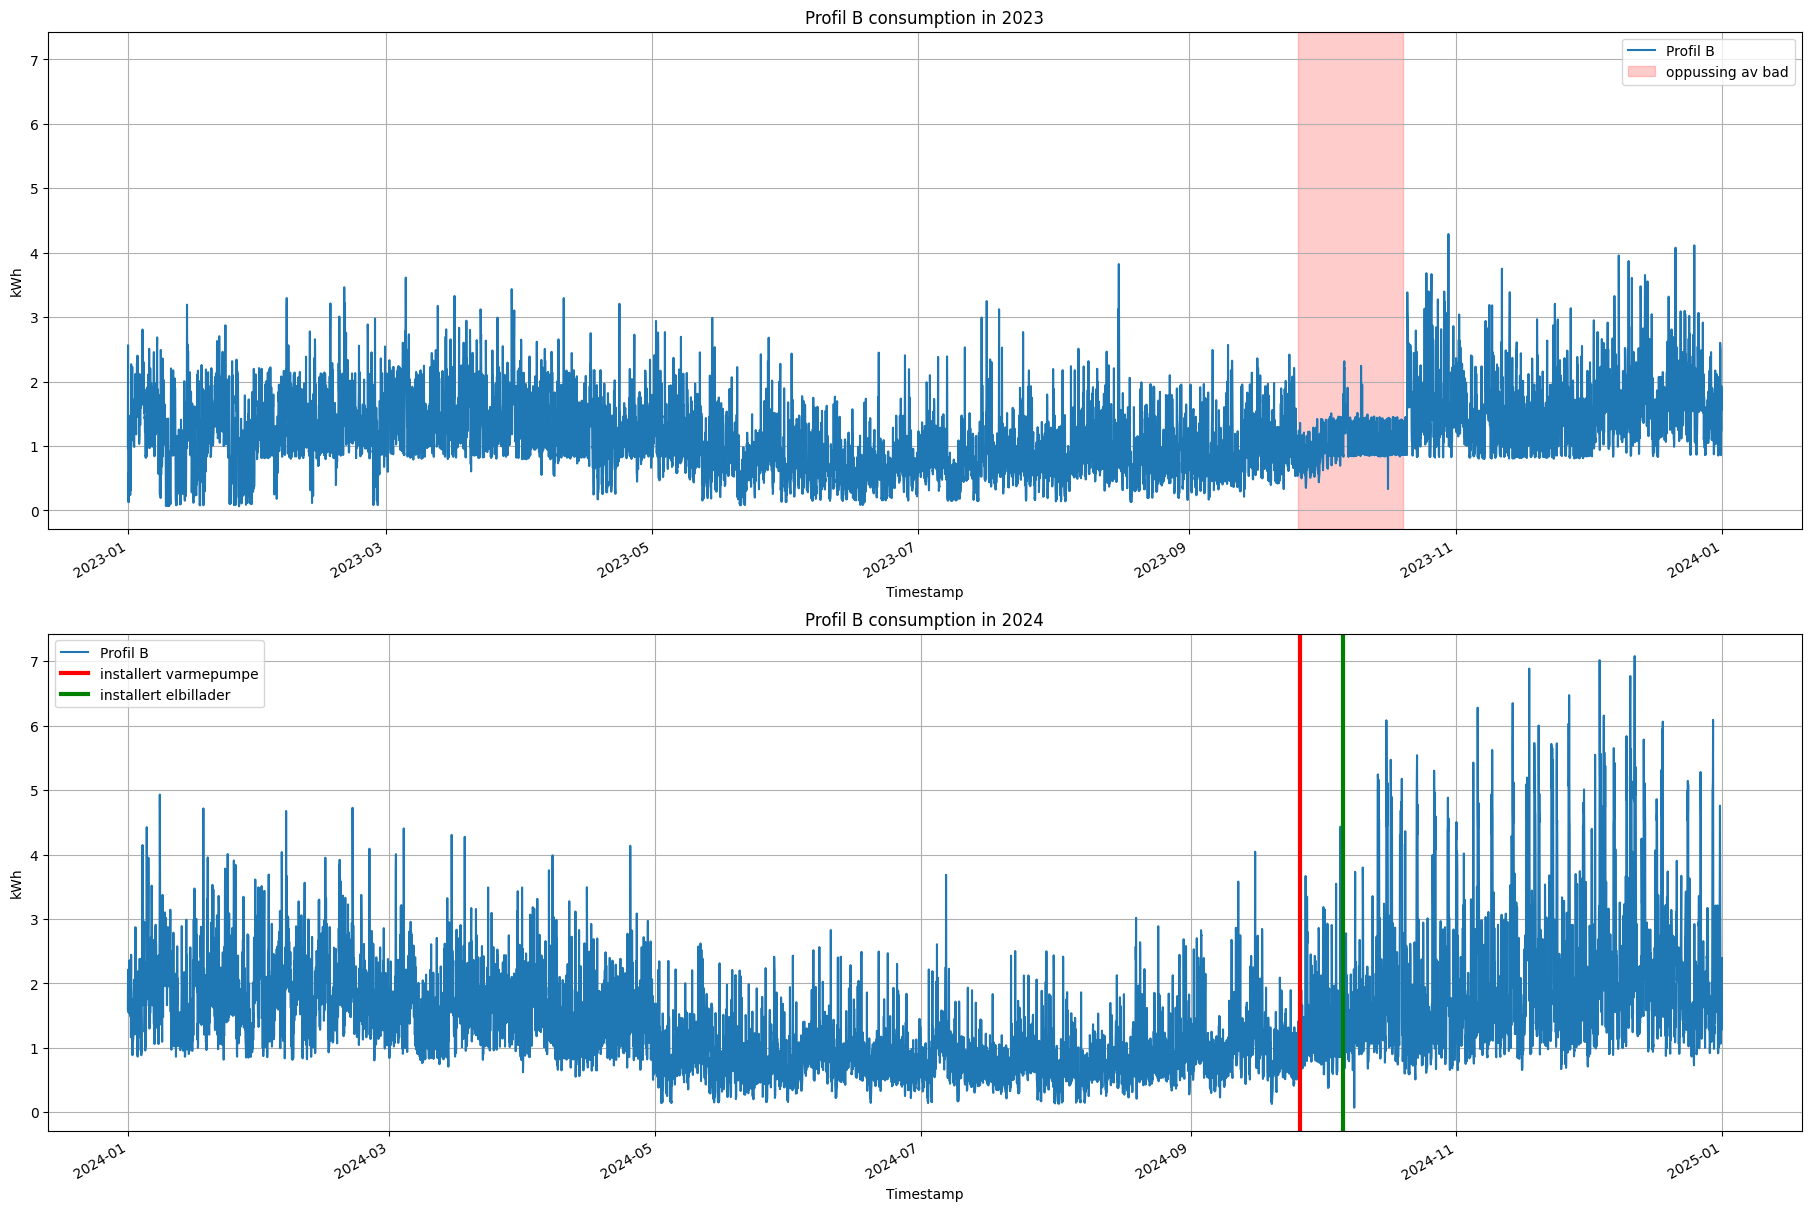

In [168]:
fig, ax = plt.subplots(2,1, figsize=(18,12), sharey=True, layout='constrained')
vol.loc['2023', ['Profil B']].plot(ax=ax[0], style='-', x_compat=True)
vol.loc['2024', ['Profil B']].plot(ax=ax[1], style='-', x_compat=True)
ax[0].axvspan(xmin=pd.Timestamp('2023-09-26'), xmax=pd.Timestamp('2023-10-20'), color='red', alpha=0.2, label='oppussing av bad')
ax[1].axvline(pd.Timestamp('2024-09-26'), color='red', alpha=1, label='installert varmepumpe', lw=3)
ax[1].axvline(pd.Timestamp('2024-10-06'), color='green', alpha=1, label='installert elbillader', lw=3)
ax[0].set(title='Profil B consumption in 2023', ylabel='kWh')
ax[0].grid()
ax[0].legend()
ax[1].set(title='Profil B consumption in 2024', ylabel='kWh')
ax[1].grid()
ax[1].legend()

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose, MSTL

In [189]:
dvol = vol['Profil B'].loc['2023':'2024'].interpolate(method='index').resample('d').mean()

In [198]:
mstl = MSTL(dvol, periods=[365, 7])

In [199]:
sermstl=mstl.fit()

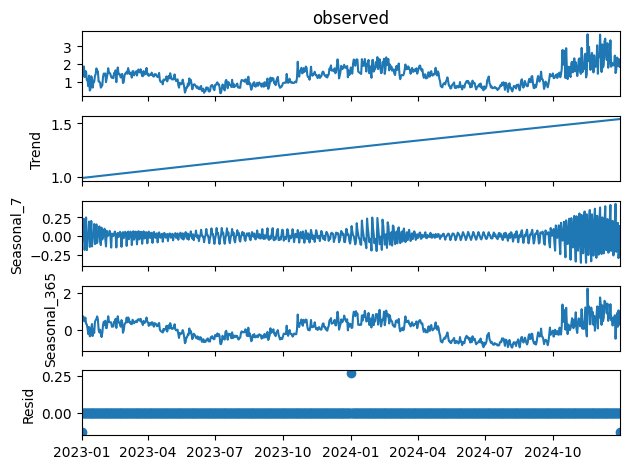

In [201]:
sermstl.plot();

<Axes: xlabel='Timestamp'>

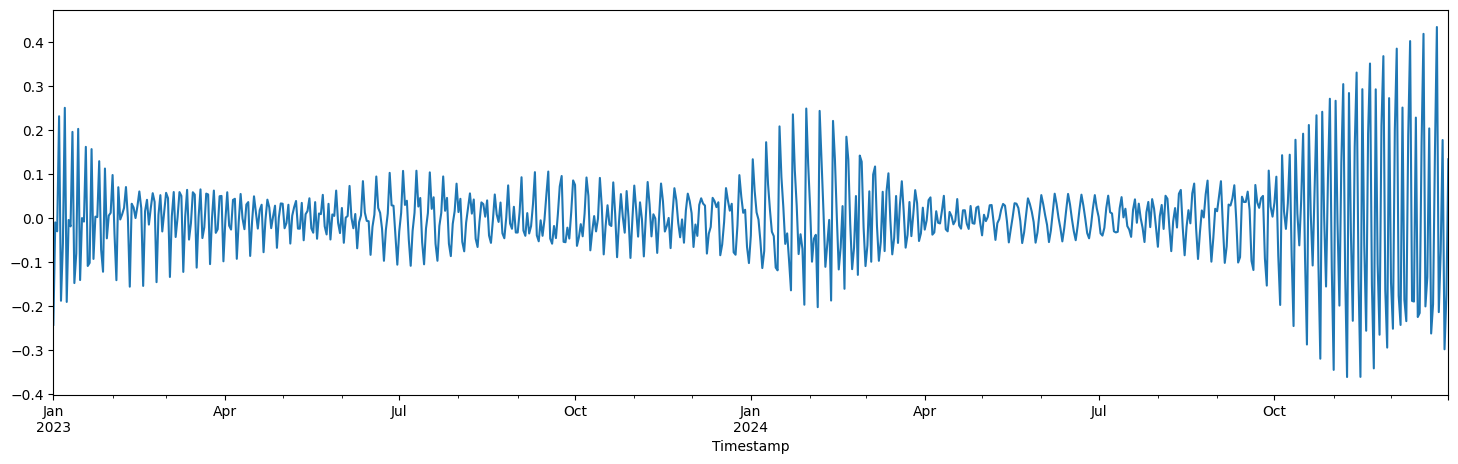

In [205]:
sermstl.seasonal['seasonal_7'].plot(figsize=(18,5))

In [208]:
cost_ab_strøm.resample('YS').sum()

,Profil A,Profil B
Timestamp,,
2023-01-01,4251.376452,6955.293091
2024-01-01,4557.825847,6905.088751


In [209]:
cost_ab_norges.resample('YS').sum()

,Profil A,Profil B
Timestamp,,
2023-01-01,2603.852,4001.1528
2024-01-01,3341.892,4988.6684


In [216]:
scaling = vol[['Profil A', 'Profil B']].resample('YS').sum().values / vol[['NO1', 'NO2']].resample('YS').sum()

In [217]:
cost_no_strøm.resample('YS').sum()*scaling

,NO1,NO2
Timestamp,,
2023-01-01,4171.098482,7024.547211
2024-01-01,4255.458327,7019.544976


In [219]:
1 - cost_no_norges.resample('YS').sum()*scaling / cost_no_norges.resample('YS').sum()*scaling

,NO1,NO2
Timestamp,,
2023-01-01,0.782166,0.477707
2024-01-01,0.648768,0.222324


In [221]:
cost_no_strøm_agg_unscaled = cost_no_strøm.resample('YS').sum()
cost_no_strøm_agg = cost_no_strøm.resample('YS').sum()*scaling

cost_no_norges_agg_unscaled = cost_no_norges.resample('YS').sum()
cost_no_norges_agg = cost_no_norges.resample('YS').sum()*scaling

In [223]:
cost_ab_strøm_agg = cost_ab_strøm.resample('YS').sum()
cost_ab_norges_agg = cost_ab_norges.resample('YS').sum()

In [224]:
cost_no_strøm_agg_unscaled - cost_no_norges_agg_unscaled

,NO1,NO2
Timestamp,,
2023-01-01,3357.948596,4183.478552
2024-01-01,1541.497895,2302.948422


In [225]:
cost_no_strøm_agg - cost_no_norges_agg

,NO1,NO2
Timestamp,,
2023-01-01,1567.246482,3023.394411
2024-01-01,913.566327,2030.876576


In [226]:
cost_ab_strøm_agg - cost_ab_norges_agg

,Profil A,Profil B
Timestamp,,
2023-01-01,1647.524452,2954.140291
2024-01-01,1215.933847,1916.420351


<Axes: xlabel='Timestamp'>

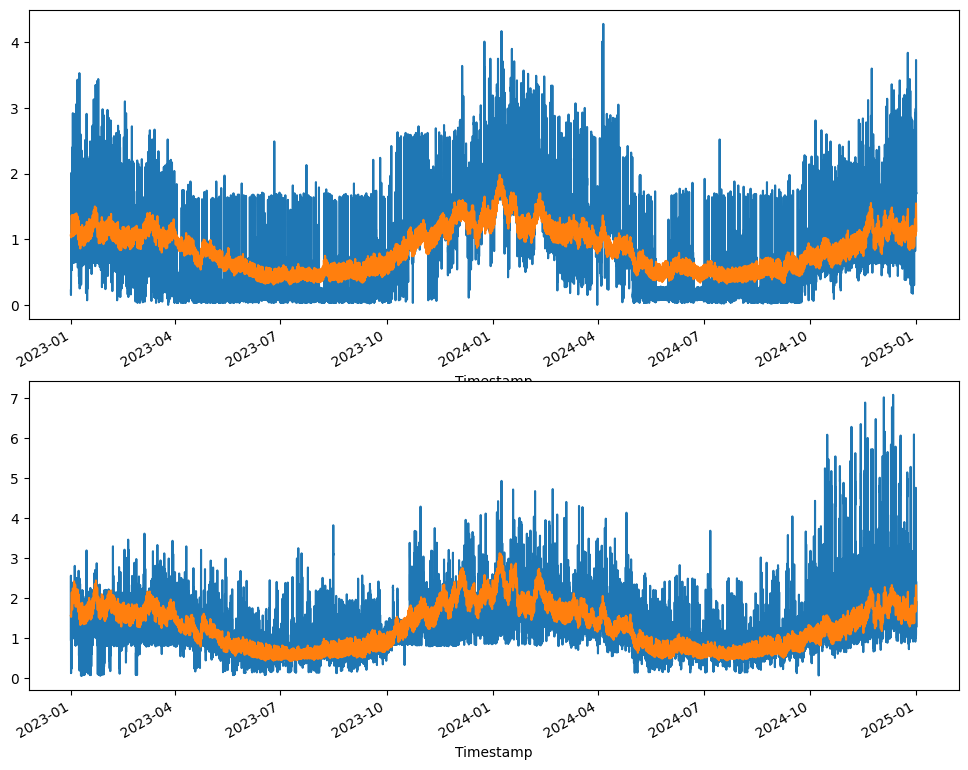

In [250]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
vol['Profil A'].loc['2023':'2024'].plot(ax=ax[0], label='Profil A')
vol['NO2'].loc['2023':'2024'].mul(vol.loc['2023':'2024','Profil A'].sum() / vol.loc['2023':'2024','NO2'].sum()).plot(ax=ax[0], label='snittprofil')

vol['Profil B'].loc['2023':'2024'].plot(ax=ax[1], label='Profil B')
vol['NO1'].loc['2023':'2024'].mul(vol.loc['2023':'2024','Profil B'].sum() / vol.loc['2023':'2024', 'NO2'].sum()).plot(ax=ax[1], label='snittprofil')

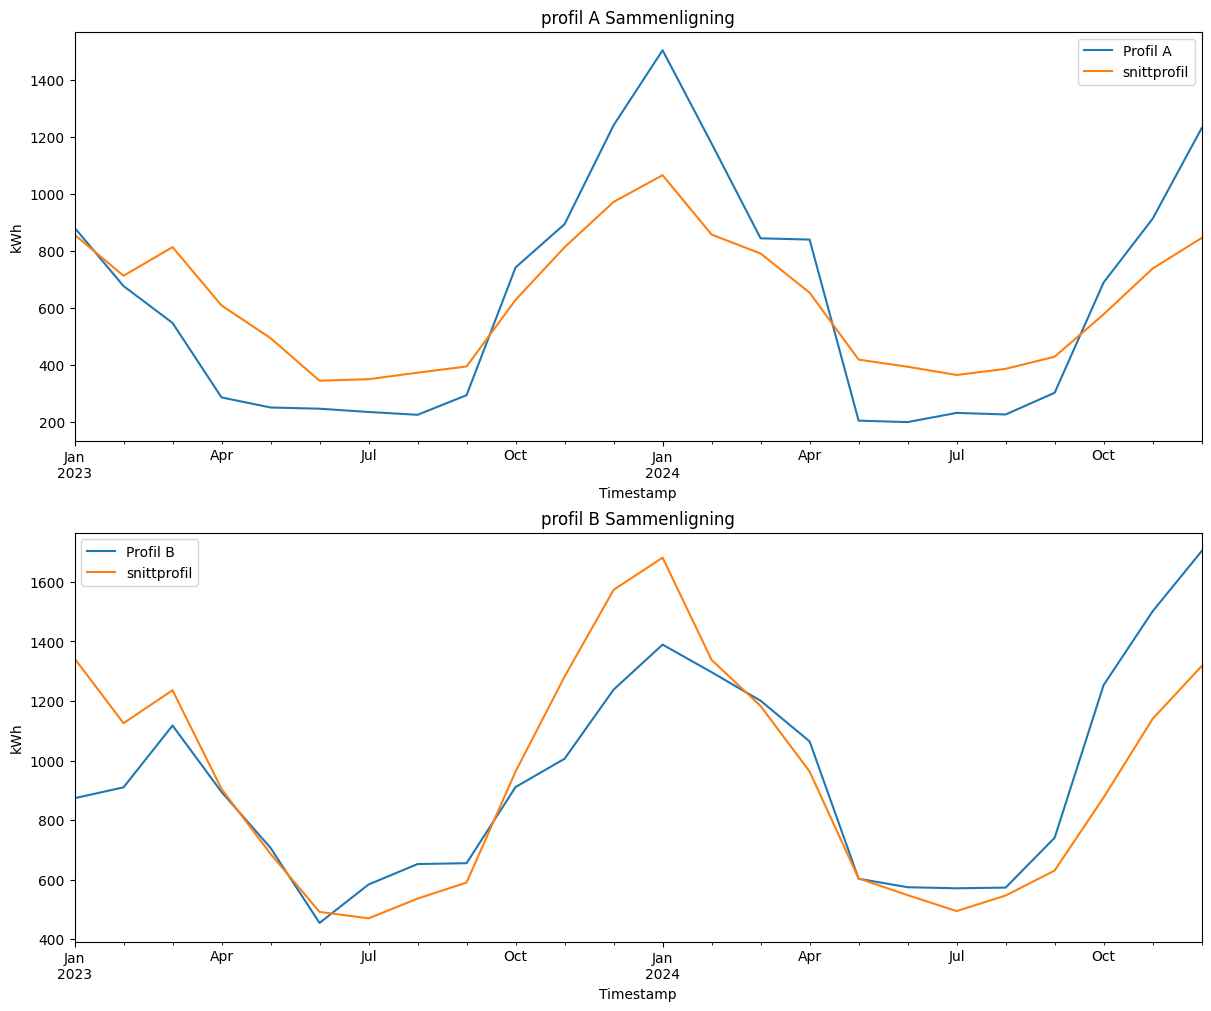

In [253]:
fig, ax = plt.subplots(2,1, figsize=(12,10), layout='constrained')
vol['Profil A'].loc['2023':'2024'].resample('MS').sum().plot(ax=ax[0], label='Profil A')
vol['NO2'].loc['2023':'2024'].mul(vol.loc['2023':'2024','Profil A'].sum() / vol.loc['2023':'2024','NO2'].sum()).resample('MS').sum().plot(ax=ax[0], label='snittprofil')
ax[0].set(title='profil A Sammenligning', ylabel='kWh')
ax[0].legend()

vol['Profil B'].loc['2023':'2024'].resample('MS').sum().plot(ax=ax[1], label='Profil B')
vol['NO1'].loc['2023':'2024'].mul(vol.loc['2023':'2024','Profil B'].sum() / vol.loc['2023':'2024', 'NO2'].sum()).resample('MS').sum().plot(ax=ax[1], label='snittprofil')
ax[1].set(title='profil B Sammenligning', ylabel='kWh')
ax[1].legend()

<Axes: xlabel='Timestamp'>

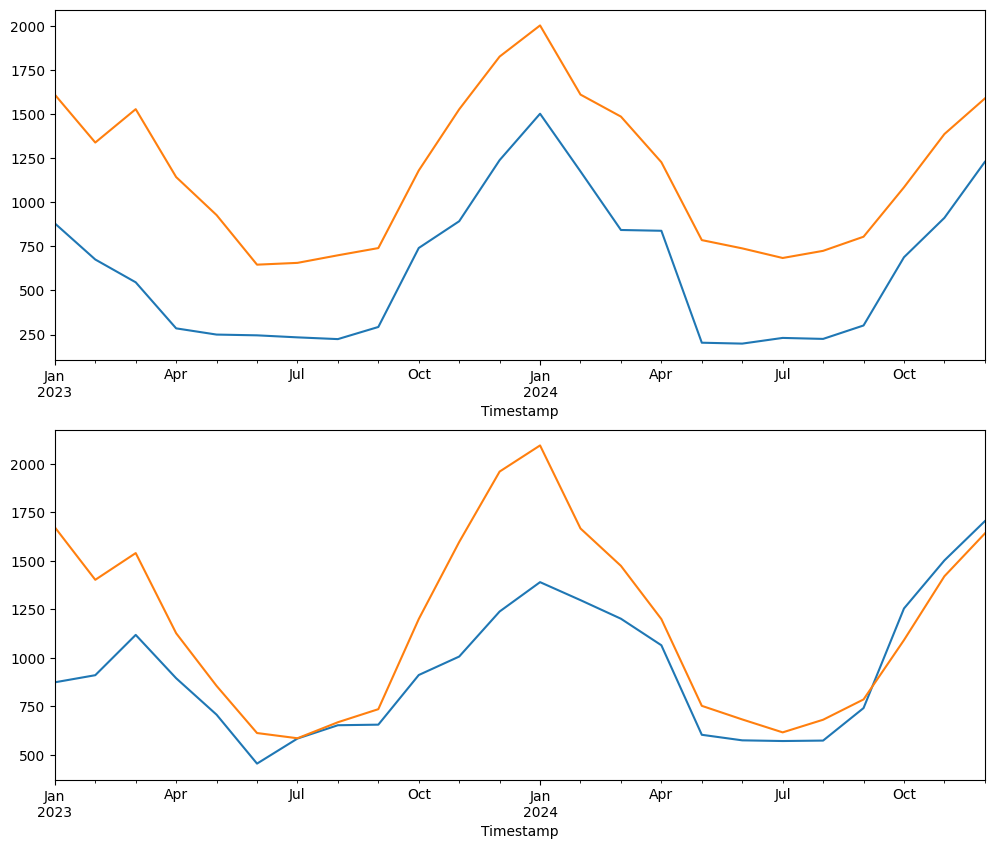

In [251]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
vol['Profil A'].loc['2023':'2024'].resample('MS').sum().plot(ax=ax[0], label='Profil A')
vol['NO2'].loc['2023':'2024'].resample('MS').sum().plot(ax=ax[0], label='snittprofil')

vol['Profil B'].loc['2023':'2024'].resample('MS').sum().plot(ax=ax[1], label='Profil B')
vol['NO1'].loc['2023':'2024'].resample('MS').sum().plot(ax=ax[1], label='snittprofil')

In [241]:
scaling = vol[['Profil A', 'Profil B']].sum().values / vol[['NO1', 'NO2']].sum().values

<Axes: xlabel='Timestamp'>

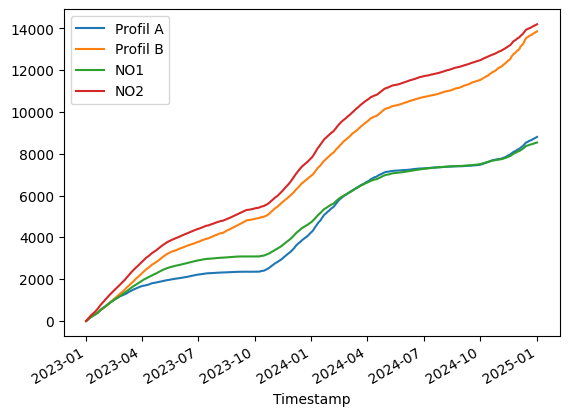

In [243]:
ax=cost_ab_strøm.cumsum().plot()
cost_no_strøm.cumsum().mul(scaling).plot(ax=ax)

<Axes: xlabel='Timestamp'>

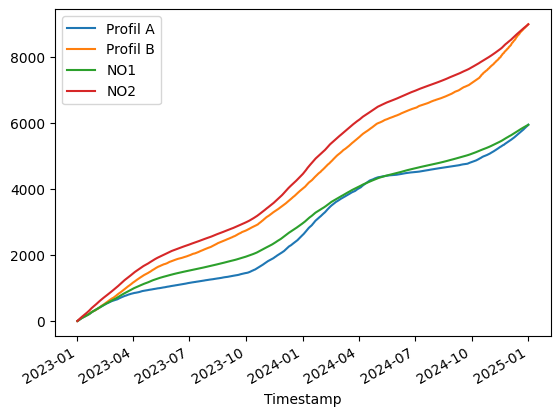

In [244]:
ax=cost_ab_norges.cumsum().plot()
cost_no_norges.cumsum().mul(scaling).plot(ax=ax)

In [ ]:
pd.DataFrame([
    '2023'
])

In [227]:
(cost_no_strøm_agg_unscaled - cost_no_norges_agg_unscaled)/cost_no_strøm_agg_unscaled

,NO1,NO2
Timestamp,,
2023-01-01,0.375740,0.430404
2024-01-01,0.214681,0.289317


In [228]:
(cost_no_strøm_agg - cost_no_norges_agg)/cost_no_strøm_agg

,NO1,NO2
Timestamp,,
2023-01-01,0.375740,0.430404
2024-01-01,0.214681,0.289317


In [229]:
(cost_ab_strøm_agg - cost_ab_norges_agg)/cost_ab_strøm_agg

,Profil A,Profil B
Timestamp,,
2023-01-01,0.387527,0.424733
2024-01-01,0.266779,0.277537


In [233]:
vol[['Profil A', 'Profil B']].resample('YS').sum()

,Profil A,Profil B
Timestamp,,
2023-01-01,6509.63,10002.882
2024-01-01,8354.73,12471.671
